Final Weights: [0.40767398 0.43596648 0.65415046]  with normalization
Final Bias: -0.34891051791122735
   Feature 1  Feature 2
0      15.50      40.00
1      23.75      23.25
2       8.00      17.00
3      17.00      21.00
4       5.50      10.00
5      19.00      12.00
6      24.00      20.00
7       2.50      12.00
8       7.50      15.00
9      11.00      26.00
   Label
0    5.0
1    5.0
2    2.0
3    5.0
4    2.0
5    2.0
6    5.0
7    2.0
8    2.0
9    5.0


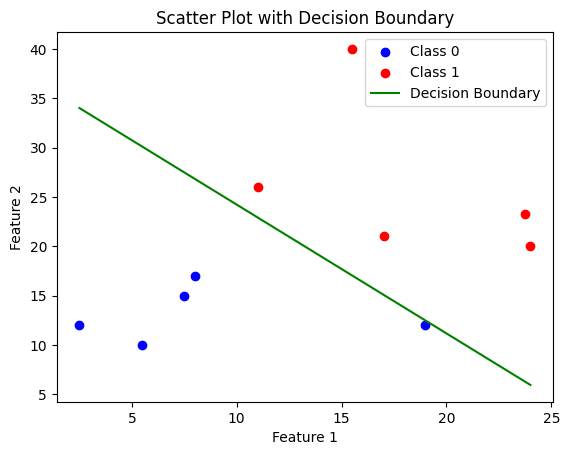

In [43]:
## use randon weights intialization the plot may vary after running the code but it will classify the data with correct classification
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# Define the perceptron class
class Perceptron:
    def __init__(self, input_size, learning_rate=0.01, epochs=1000):
        self.weights = np.random.rand(input_size)
        self.bias = np.random.rand()
        self.learning_rate = learning_rate
        self.epochs = epochs

    def predict(self, inputs):
        # Calculate the weighted sum and apply the step function
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        return 1 if weighted_sum > 0 else 0

    def train(self, X, y):
        for epoch in range(self.epochs):
            for i in range(len(X)):
                prediction = self.predict(X[i])
                error = y[i] - prediction
                self.weights += self.learning_rate * error * X[i]
                self.bias += self.learning_rate * error

        # After training is done, print the final weights and bias
        print("Final Weights:", self.weights, " with normalization")
        print("Final Bias:", self.bias)

# Define a function to normalize data between 0 and 1
def normalize_data(data):
    min_val = np.min(data, axis=0)
    max_val = np.max(data, axis=0)
    normalized_data = (data - min_val) / (max_val - min_val)
    return normalized_data, min_val, max_val


# given data
data = np.array([
    [15.5, 40, 5],
    [23.75, 23.25, 5],
    [8, 17, 2],
    [17, 21, 5],
    [5.5, 10, 2],
    [19, 12, 2],
    [24, 20, 5],
    [2.5, 12, 2],
    [7.5, 15, 2],
    [11, 26, 5]
])
# define labels 5 as 1 and 2 as 0
labels = np.array([1, 1, 0, 1, 0, 0, 1, 0, 0, 1])

# Normalize the data and get min and max values
normalized_data, min_val, max_val = normalize_data(data)

# Plot the raw data
plt.scatter(data[labels == 0][:, 0], data[labels == 0][:, 1], c='b', label='Class 0')
plt.scatter(data[labels == 1][:, 0], data[labels == 1][:, 1], c='r', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Create and train the perceptron
perceptron = Perceptron(input_size=3)
perceptron.train(normalized_data, labels)

# Define the decision boundary line
x_values = np.array([np.min(normalized_data[:, 0]), np.max(normalized_data[:, 0])])
y_values = -(perceptron.weights[0] * x_values + perceptron.bias) / perceptron.weights[1]

# Define a function to denormalize data
def denormalize_data(normalized_data, min_val, max_val):
    return normalized_data * (max_val - min_val) + min_val

# Denormalize the decision boundary line
x_values = denormalize_data(x_values, min_val[0], max_val[0])
y_values = denormalize_data(y_values, min_val[1], max_val[1])

# Plot the decision boundary line
plt.plot(x_values, y_values, label='Decision Boundary', linestyle='-', c='g')
X = pd.DataFrame(data[:, [0,1]])# priniting original value
X.columns = ['Feature 1', 'Feature 2']
print(X)
y=pd.DataFrame(data[:,2])
y.columns = ['Label']
print(y)
plt.legend()
plt.title('Scatter Plot with Decision Boundary')
plt.show()